In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
from algorithm.dictionary import Dictionary, DictionaryType
from algorithm.sparse_solver import SparseSolver
import pywt

from scipy.ndimage import median_filter
from scipy.ndimage import gaussian_filter




In [2]:

def check_config(config: dict):
    if "epsilon" not in config:
        config["sparse_model"]["epsilon"] = \
            np.sqrt(1.1) * config["sparse_model"]["patch_size"][0] * config["image_degradation"]["noise_sigma"]

    if not config["sparse_model"]["enable_dictionary_learning"]:
        config["sparse_model"]["num_learning_iterations"] = 0


In [3]:
CONFIG = {
    "image_degradation": {
        "noise_sigma": 50,
        "random_seed": 41,
        "degradation_type": None
    },
    "sparse_model": {
        "patch_size": (5,5),  # The patch must be a square
        "initial_dict": DictionaryType.DCT,
        "enable_dictionary_learning": True,  # False means a predefined dictionary will be used.
        "num_learning_iterations": 4,  # number of learning iterations
        "epsilon": 210,
        "verbose": True,
    },
}

In [4]:
check_config(CONFIG)

In [5]:
img = np.array(Image.open("Dataset\\ndsi\\gennaio_2023.png"))[:, : , 0]
#img = np.array(Image.open("Dataset\\ndsi\\ndsi_agosto23.png"))[:, : , 0]


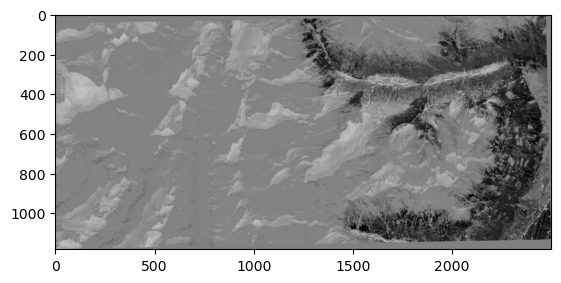

In [6]:
plt.figure()
plt.imshow(img, "gray")
plt.show()

Same above but with wavlet 

In [7]:
dictionary= Dictionary(
        dictionary_type=CONFIG["sparse_model"]["initial_dict"], patch_size=CONFIG["sparse_model"]["patch_size"]
    )

In [8]:
#passo denoised_img_vw che e degraded_img a cui ho applicato vw

sparse_solver = SparseSolver(
        enable_dictionary_learning=CONFIG["sparse_model"]["enable_dictionary_learning"],
        num_learning_iterations=CONFIG["sparse_model"]["num_learning_iterations"],
        img=img,
        dictionary=dictionary,
        epsilon=CONFIG["sparse_model"]["epsilon"],
        verbose=CONFIG["sparse_model"]["verbose"]
    )

In [9]:
reconstructed_img= sparse_solver()

Pacthes after extraction (25, 2940288)
Dimesione dictionary (25, 25)
Dimensione patch (25, 2940288)
0
NUm of atom 25 num od patches 2940288
A shape (25, 2940288)
1
NUm of atom 25 num od patches 2940288
A shape (25, 2940288)
2
NUm of atom 25 num od patches 2940288
A shape (25, 2940288)
3
NUm of atom 25 num od patches 2940288
A shape (25, 2940288)
NUm of atom 25 num od patches 2940288
A shape (25, 2940288)


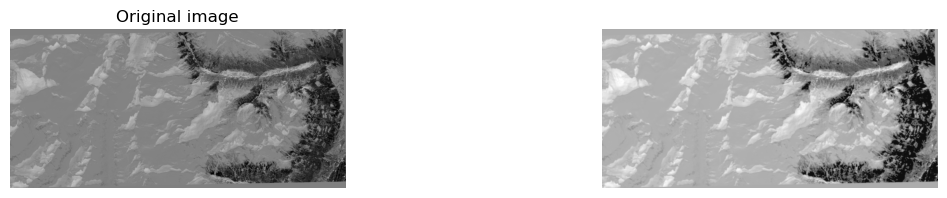

In [10]:
plt.figure(figsize=(14, 7))

plt.subplot(3 ,2, 1)
plt.imshow(img, "gray")
plt.axis("off")
plt.title("Original image")

plt.subplot(3, 2 ,2)
plt.imshow(reconstructed_img, "gray")
plt.axis("off")


plt.show()

make some calculation on gaussina filter

In [11]:
gaussin = gaussian_filter(img, sigma=5)

In [12]:
median = median_filter(img,  size=5)  

Save immage

In [ ]:
# Save the NumPy array as a grayscale image using matplotlib

"""

plt.imsave('change_det\\ndsi_agosto23_filter\\reconstructed_img_ndsi_agosto_2023.png', reconstructed_img, cmap='gray')

plt.imsave('change_det\\ndsi_agosto23_filter\\gaussian_ndsi_agosto_2023.png', gaussin, cmap='gray')

plt.imsave('change_det\\ndsi_agosto23_filter\\median_ndsi_agosto_2023.png', median, cmap='gray')
"""


plt.imsave('change_det\\ndsi_gennaio_2023_filter\\reconstructed_img_ndsi_gennaio_2023.png', reconstructed_img, cmap='gray')

plt.imsave('change_det\\ndsi_gennaio_2023_filter\\gaussian_ndsi_gennaio_2023.png', gaussin, cmap='gray')

plt.imsave('change_det\\ndsi_gennaio_2023_filter\\median_ndsi_gennaio_2023.png', median, cmap='gray')
